In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Cleaned_Car_Details.csv')

def extract_torque_value(torque_str):
    if pd.isna(torque_str) or torque_str == 'Unknown':
        return np.nan
    for s in torque_str.split():
        s = s.replace(',', '').replace('@', '').replace('(', '').replace(')', '')
        try:
            return float(s)
        except ValueError:
            continue
    return np.nan

df['torque_value'] = df['torque'].apply(extract_torque_value)
df = df.drop('torque', axis=1)
df = df.dropna()

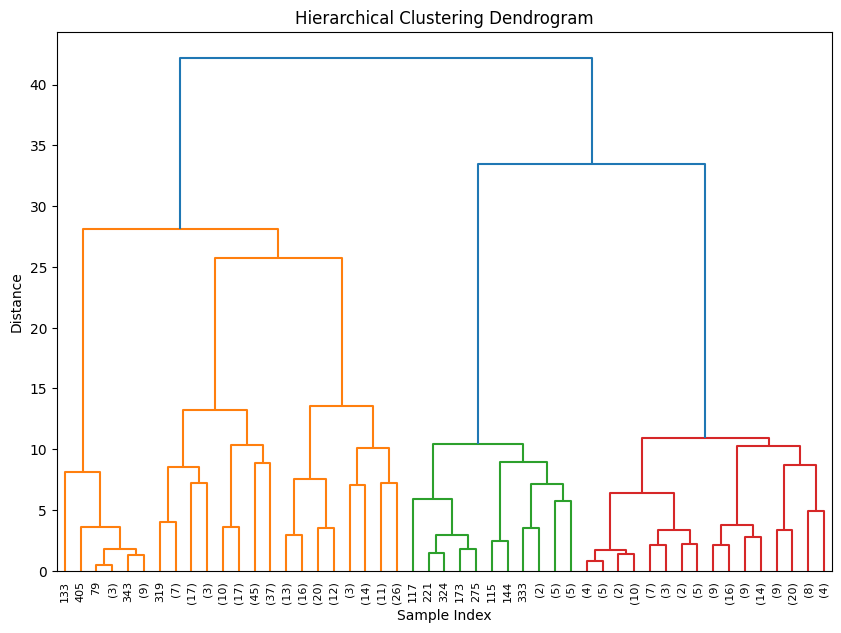

In [ ]:
categorical_cols = ['fuel', 'transmission']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

features = ['year', 'mileage', 'engine', 'max_power', 'torque_value', 'seats', 'fuel', 'transmission']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Silhouette Score: 0.420047242428393


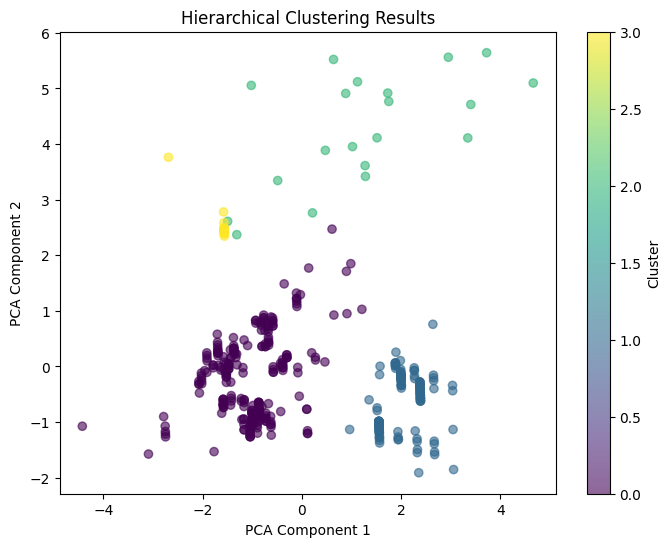

In [ ]:
optimal_clusters = 4

hc = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
df['hierarchical_cluster'] = hc_labels

print("Silhouette Score:", silhouette_score(X_scaled, hc_labels))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
numerical_features = ['year', 'mileage', 'engine', 'max_power', 'torque_value', 'seats']

print(df.groupby('name').mean()[numerical_features])

                                                   year  mileage  engine  \
name                                                                       
Audi A4 1.8 TFSI                                 2010.0    12.30  1781.0   
BMW 5 Series 520d                                2008.0    18.48  1995.0   
BMW 5 Series 523i                                2010.0    10.80  2497.0   
BMW 5 Series 530d                                2013.0    16.20  2993.0   
BMW X5 3.0d                                      2008.0    11.00  2993.0   
...                                                 ...      ...     ...   
Toyota Innova Crysta 2.5 VX BS IV                2011.0    12.80  2494.0   
Volkswagen Jetta 1.6 Trendline                   2010.0    14.00  1595.0   
Volkswagen Jetta 2.0 TDI Comfortline             2010.5    15.00  1896.0   
Volkswagen Passat Highline DSG S                 2008.0    14.30  1968.0   
Volkswagen Passat Highline DSG S (Spl. Edition)  2012.0    14.30  1968.0   

           

In [ ]:
df.to_csv('Hierarchical_Clustered_Car_Details.csv', index=False)